# Fetching and Cleaning HTML Text

### NLP 2017 - HW1

November 2016 - [NLP17(http://www.cs.bgu.ac.il/~elhadad/nlp17.html)

We will compare two different methods to clean raw HTML text into text.
HTML pages contain many "non textual" elements, in the form of HTML tags, jscript code, lots of advertisement and in general repetitive content which we will refer to as "boilerplate" content (menus, navigation etc).

We are intersted in extracting from a random HTML page the non-boilerplate textual content.

We will compare two libraries that achieve this.

First, let us get raw HTML from a URL:

In [4]:
import requests

# test1

url = "http://www.bbc.com/news/technology-26415021"
html = requests.get(url).text

Let us inspect the resulting raw HTML string we obtained:

In [5]:
print(html[:200])

<!DOCTYPE html>
<html lang="en" id="responsive-news">
<head  prefix="og: http://ogp.me/ns#">
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
    <title>An


Too many white spaces and empty lines, let us clean it up a bit:

In [6]:
import re

html = re.sub("[\r\n]+", "\n", html)
html = re.sub("[\n]+", "\n", html)
html = re.sub("[\t, ]+"," ", html)


In [7]:
html

'<!DOCTYPE html>\n<html lang="en" id="responsive-news">\n<head prefix="og: http://ogp.me/ns#">\n <meta charset="utf-8">\n <meta http-equiv="X-UA-Compatible" content="IE=edge chrome=1">\n <title>An hour to catch the coding bug - BBC News</title>\n <meta name="description" content="Is it possible to get children interested in computer programming in just 60 minutes? The Hour of Code has been designed to do just that.">\n <link rel="dns-prefetch" href="https://ssl.bbc.co.uk/">\n <link rel="dns-prefetch" href="http://sa.bbc.co.uk/">\n <link rel="dns-prefetch" href="http://ichef-1.bbci.co.uk/">\n <link rel="dns-prefetch" href="http://ichef.bbci.co.uk/">\n <link rel="dns-prefetch" href="//c.go-mpulse.net/">\n <meta name="x-country" content="il">\n <meta name="x-audience" content="International">\n <meta name="CPS_AUDIENCE" content="International">\n <meta name="CPS_CHANGEQUEUEID" content="">\n <link rel="canonical" href="http://www.bbc.com/news/technology-26415021">\n <link rel="alternate" h

This is becoming a mess, let us get line breaks back:

In [8]:
html = html.split("\n") # html is now a list of lines
html = "\n".join(html)    # we turn it back into a single string
print(html)

<!DOCTYPE html>
<html lang="en" id="responsive-news">
<head prefix="og: http://ogp.me/ns#">
 <meta charset="utf-8">
 <meta http-equiv="X-UA-Compatible" content="IE=edge chrome=1">
 <title>An hour to catch the coding bug - BBC News</title>
 <meta name="description" content="Is it possible to get children interested in computer programming in just 60 minutes? The Hour of Code has been designed to do just that.">
 <link rel="dns-prefetch" href="https://ssl.bbc.co.uk/">
 <link rel="dns-prefetch" href="http://sa.bbc.co.uk/">
 <link rel="dns-prefetch" href="http://ichef-1.bbci.co.uk/">
 <link rel="dns-prefetch" href="http://ichef.bbci.co.uk/">
 <link rel="dns-prefetch" href="//c.go-mpulse.net/">
 <meta name="x-country" content="il">
 <meta name="x-audience" content="International">
 <meta name="CPS_AUDIENCE" content="International">
 <meta name="CPS_CHANGEQUEUEID" content="">
 <link rel="canonical" href="http://www.bbc.com/news/technology-26415021">
 <link rel="alternate" hreflang="en-gb" hr

We give up -- to much noise in this page! How can we get just the text out of this?

Let us use existing libraries.

The first we try is called BeautifulSoup.  It is a library to parse "noisy" HTML in general.  
Once parsed, the HTML string can be navigated in a convenient manner.
Make sure you install beautifulsoup4 by running:

% pip install beautifulsoup4

We can then run this:

In [9]:
from bs4 import BeautifulSoup

def clean_html1(html):
    soup = BeautifulSoup(html)
    return soup.get_text()

Let us try this version of clean_html:

In [10]:
print(clean_html1(html))





An hour to catch the coding bug - BBC News































 {
 "@context": "http://schema.org"
 "@type": "Article"
 
 "url": "http://www.bbc.com/news/technology-26415021"
 "publisher": {
 "@type": "Organization" 
 "name": "BBC News" 
 "logo": "http://www.bbc.co.uk/news/special/2015/newsspec_10857/bbc_news_logo.png?cb=1"
 }
 
 "headline": "An hour to catch the coding bug"
 "author": "Mark Ward"
 "mainEntityOfPage": "http://www.bbc.com/news/technology-26415021"
 "articleBody": "Is it possible to get children interested in computer programming in just 60 minutes? The Hour of Code has been designed to do just that."
 
 "image": {
 "@list": [
 "http://ichef-1.bbci.co.uk/news/560/media/images/73325000/jpg/_73325163_olly009.jpg"
 "http://ichef.bbci.co.uk/news/560/media/images/73325000/jpg/_73325167_hourofcode.jpg"
 "http://ichef.bbci.co.uk/news/560/media/images/73325000/jpg/_73325169_appinventor.jpg"
 ]
 }
 "datePublished": "2014-03-03T10:22:55+00:00"
 }
 













var 

C:\Users\Asi\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file C:\Users\Asi\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


We got rid of the HTML tags, but we still have lots of "non text" - mainly javascript code.
We can still use beautifulsoup to navigate the HTML DOM structure and filter out the script blocks - this will be effective in this case.

But we can go faster and use the justext library.  This is developed specifically to remove boilerplate from html strings.
It uses a very nice machine learning algorithm which is documented in its homepage.

Make sure you install the library first:

% pip install justext

Now let's try it:

In [11]:
import justext

def clean_html2(html):
    paragraphs = justext.justext(html, justext.get_stoplist('English'))
    return "\n".join([p.text for p in paragraphs if not p.is_boilerplate])



Let us try this second version of clean_html:

In [12]:
print(clean_html2(html))

I'm putting my twin 10-year-old boys Toby and Callum through the Hour of Code - a campaign that seeks to ignite an interest in programming - the part we're doing using specially created web-based exercises.
The campaign begun in the US has landed in the UK where it also coincides with government calls for as many children as possible to get coding.
Programming is being pushed because in an ever more technological world it can only be a good thing to give people a peep into what goes on behind the touch screen cash point and website.
The Hour of Code is supposed to be the start of that journey and I like many other parents feel it's one my children should be embarking on. I do feel like a clock somewhere is ticking and unless they get started with this essential skill they'll be left behind.
"In the future kids are going to be doing programming " said Callum when I asked him why it was worth learning how to code. "We need to learn so we can do stuff with the computer otherwise it will b

## Tokenizing

Now that we have clean text, let us tokenize it into a list of words.

We will use nltk tokenizer to do this.  Make sure you have nltk installed, and that you invoke nltk.download() to download the datasets that come with it.

Then let us try the tokenizer.

In [13]:
import nltk

tokens = nltk.word_tokenize(clean_html2(html))

print("We found %s tokens" % (len(tokens)))

We found 1079 tokens


The output of justext is organized in paragraphs.  We converted them as one line of text each.

In [14]:
paragraphs = clean_html2(html).split("\n")
p0 = paragraphs[0]
print(nltk.word_tokenize(p0))

['I', "'m", 'putting', 'my', 'twin', '10-year-old', 'boys', 'Toby', 'and', 'Callum', 'through', 'the', 'Hour', 'of', 'Code', '-', 'a', 'campaign', 'that', 'seeks', 'to', 'ignite', 'an', 'interest', 'in', 'programming', '-', 'the', 'part', 'we', "'re", 'doing', 'using', 'specially', 'created', 'web-based', 'exercises', '.']


Note how abbreviations in English are tokenized ("I'm" becomes ["I", "'m"]).

1. Data exploration
1.1 Manual tagging


In [16]:
sentence1 = "One of the most basic and most useful task when processing text is to tokenize each word separately and label each word according to its most likely part of speech."
sentence1_manual_tagging = "One/DET of/ADP the/DET most/ basic/ and/ most/ useful/ task/NOUN when/ processing/VERB text/NOUN is/ to/ tokenize/VERB each/ word/NOUN seaperately/ and/ label/VERB each/ word/NOUN according/ to/ its/ most/ likely/ part/ of/ speech/ "

In [20]:
sentence1_manual_tagging =nltk.pos_tag(nltk.word_tokenize(sentence1))

In [21]:
print(sentence1_manual_tagging)

[('One', 'CD'), ('of', 'IN'), ('the', 'DT'), ('most', 'RBS'), ('basic', 'JJ'), ('and', 'CC'), ('most', 'JJS'), ('useful', 'JJ'), ('task', 'NN'), ('when', 'WRB'), ('processing', 'VBG'), ('text', 'NN'), ('is', 'VBZ'), ('to', 'TO'), ('tokenize', 'VB'), ('each', 'DT'), ('word', 'NN'), ('separately', 'RB'), ('and', 'CC'), ('label', 'VB'), ('each', 'DT'), ('word', 'NN'), ('according', 'VBG'), ('to', 'TO'), ('its', 'PRP$'), ('most', 'RBS'), ('likely', 'JJ'), ('part', 'NN'), ('of', 'IN'), ('speech', 'NN'), ('.', '.')]


1.2 Gathering and Cleaning Up Data

In [1]:
import google3
import justext
import requests
import re
import nltk

search = "nobel prize"
filename = "cleanTxt"
links = google3.getGoogleResults(search)
i=0
cutOff = 20
max = 10
for url in links:
    if (i<max):
            try:
                print(url)
                html = requests.get(url).text
            except:
                print("error") 
            html = re.sub("[\r\n]+", "\n", html)
            html = re.sub("[\n]+", "\n", html)
            html = re.sub("[\t, ]+"," ", html)
            html = re.sub("[\t, ]+","``", html)
            raw = google3.cleanHtml(html)
            if (raw != ''):
                pfileName = filename + str(i) + ".txt"
                print("raw "+str(i)+raw+"\n")
                google3.PrintFile(raw,pfileName)
                i+=1



https://en.wikipedia.org/wiki/Nobel_Prize
https://www.facebook.com/nobelprize/
https://www.youtube.com/user/thenobelprize
https://en.wikipedia.org/wiki/Nobel_Prize
https://www.nobelprize.org/
http://www.businessinsider.com/who-will-win-nobel-prize-in-physics-for-gravitational-waves-2016-2
https://en.wikipedia.org/wiki/List_of_Nobel_laureates_in_Physics
http://iaskracker.com/5-things-to-know-about-the-nobel-prize/
http://www.bbc.com/news/world-europe-38280402
https://sweden.se/society/the-nobel-prize-awarding-great-minds/
http://www.nytimes.com/topic/subject/nobel-prizes
http://indianexpress.com/article/world/nobel-prize-2016-bob-dylan-juan-manuel-santos-here-is-the-list-of-winners-and-their-work-4420869/
http://www.independent.co.uk/arts-entertainment/music/news/bob-dylan-nobel-prize-acceptance-speech-read-a7468096.html


In [4]:
#read and tag 20 senteces from one file   

pfileName = ".//Data//"+filename+ "0" + ".txt"
with open(pfileName) as f:
    for line in f:
        print(line)
        tokens = nltk.word_tokenize(line)
        print(tokens)
        tagging = nltk.pos_tag(tokens,tagset='universal')
        print(tagging)
        
        

#print(text)

NameError: name 'filename' is not defined

1.3 Gathering Basic Statistics

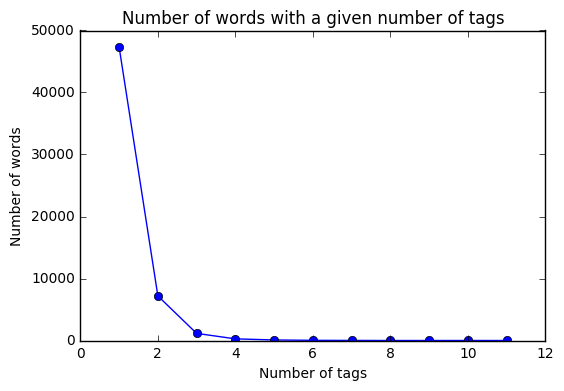

In [16]:
import nltk
from nltk.corpus import brown
import pylab

cfd = nltk.ConditionalFreqDist(brown.tagged_words())
size2words = nltk.Index((len(tags), word) for (word, tags) in cfd.items())
sizes = pylab.arange(1, 12)

pylab.plot(sizes, [len(size2words[size]) for size in sizes], '-bo')
pylab.title('Number of words with a given number of tags')
pylab.xlabel('Number of tags')
pylab.ylabel('Number of words')
pylab.show()